In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import os

font = {'size': 13}
plt.rc('font', **font)


path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/disruption")




CPURAMdataWithBothVM1 = pd.read_csv('CPURAMdataVM1WithBothMTD.txt')
CPURAMdataWithoutMTDVM1 = pd.read_csv('CPURAMdataVM1WithoutMTD.txt')

CPURAMdataWithBothVM1 = CPURAMdataWithBothVM1.iloc[1200:3000]
CPURAMdataWithoutMTDVM1 = CPURAMdataWithoutMTDVM1.iloc[1200:3000]


CPURAMdataWithBothVM1 = CPURAMdataWithBothVM1.reset_index(drop=True)
CPURAMdataWithoutMTDVM1 = CPURAMdataWithoutMTDVM1.reset_index(drop=True)
print(CPURAMdataWithBothVM1)
#print(CPURAMdataWithoutMTDVM2)

          time  CPUPerc  RAMPerc  RAMAvailable      RAMTotal BashliteActive  \
0     15:25:10     22.9     14.8  3.160138e+09  3.707105e+09          False   
1     15:25:11     24.7     14.8  3.160138e+09  3.707105e+09          False   
2     15:25:12     28.0     14.8  3.160138e+09  3.707105e+09          False   
3     15:25:13     23.7     14.8  3.160138e+09  3.707105e+09          False   
4     15:25:14     21.6     14.8  3.160138e+09  3.707105e+09          False   
...        ...      ...      ...           ...           ...            ...   
1795  15:55:44     23.2     14.8  3.160252e+09  3.707105e+09          False   
1796  15:55:45     21.9     14.8  3.160252e+09  3.707105e+09          False   
1797  15:55:46     21.7     14.8  3.160252e+09  3.707105e+09          False   
1798  15:55:47     24.7     14.8  3.160252e+09  3.707105e+09          False   
1799  15:55:48     20.8     14.8  3.160257e+09  3.707105e+09          False   

     IPConnectionPossible  
0                   Fal

In [2]:
from datetime import datetime

newTime = []

def getSeconds(timeValue):
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTime = getSeconds(CPURAMdataWithBothVM1["time"][0])


for i,timeValue in enumerate(CPURAMdataWithBothVM1["time"]):
    timeDif = getSeconds(timeValue) - startTime
    newTime.append(timeDif)
    

The RAM mean with Bashlite running is: nan
The highest Ram value  is: 46.8
The lowest Ram value  is: 17.0
The RAM mean with Bashlite not unning is: 23.54755555555552


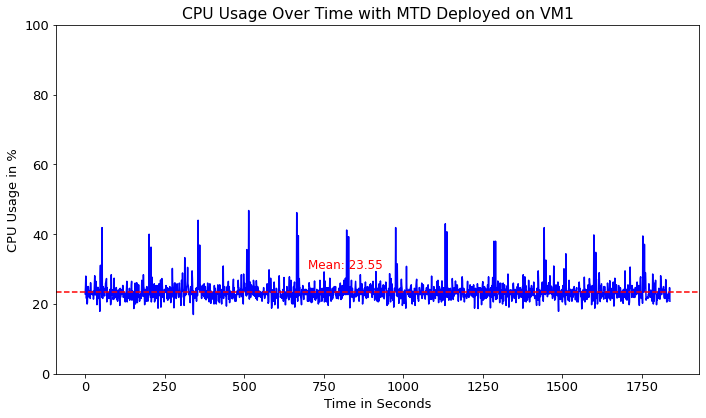

In [3]:
import matplotlib.pyplot as plt

CPURAMdataWithBothVM1["time"] = newTime

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(CPURAMdataWithBothVM1['time'], CPURAMdataWithBothVM1['CPUPerc'], c='blue')
bashliteRunningMean = CPURAMdataWithBothVM1[CPURAMdataWithBothVM1['BashliteActive'] == True]['CPUPerc'].mean()
bashliteNotRunningMean = CPURAMdataWithBothVM1[CPURAMdataWithBothVM1['BashliteActive'] == False]['CPUPerc'].mean()

highestValueRAM = 0
lowestValueRAM = 100

for index, row in CPURAMdataWithBothVM1.iterrows():
    if row["CPUPerc"] > highestValueRAM:
        highestValueRAM = row["CPUPerc"]
        
    elif row["CPUPerc"] < lowestValueRAM:
        lowestValueRAM = row["CPUPerc"]
    else:
        pass
        


print(f"The RAM mean with Bashlite running is: {bashliteRunningMean}")
print(f"The highest Ram value  is: {highestValueRAM}")
print(f"The lowest Ram value  is: {lowestValueRAM}")
print(f"The RAM mean with Bashlite not unning is: {bashliteNotRunningMean}")


ax.axhline(bashliteNotRunningMean, color='r', linestyle='--', label='mean')



plt.ylim(0, 100)
plt.title('CPU Usage Over Time with MTD Deployed on VM1')
plt.xlabel('Time in Seconds')
plt.ylabel('CPU Usage in %')

ax.text(700, 30, 'Mean: {:.2f}'.format(bashliteNotRunningMean), fontsize=12, color='r')
plt.tight_layout()
filename = "CPUVM1MTDDeployed.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()


In [4]:
startTime = getSeconds(CPURAMdataWithoutMTDVM1["time"][0])

newTime = []
for i,timeValue in enumerate(CPURAMdataWithoutMTDVM1["time"]):
    timeDif = getSeconds(timeValue) - startTime
    newTime.append(timeDif)
    
print()

The RAM mean with Bashlite running is: nan
The highest Ram value  is: 100.0
The lowest Ram value  is: 16.8
The RAM mean with Bashlite not unning is: 23.53400000000002


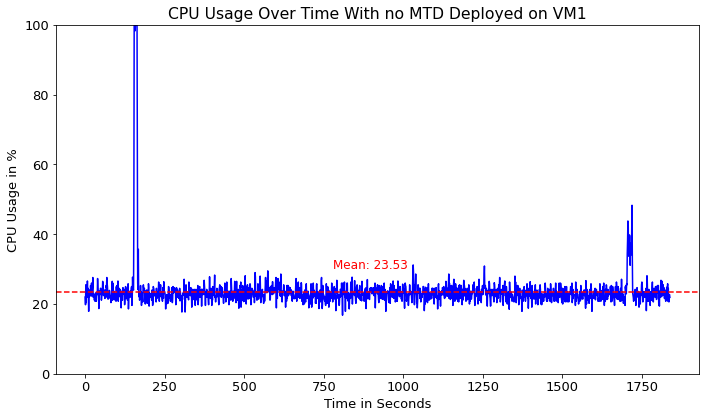

In [5]:
CPURAMdataWithoutMTDVM1["time"] = newTime

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(CPURAMdataWithoutMTDVM1['time'], CPURAMdataWithoutMTDVM1['CPUPerc'], c='blue')
bashliteNotRunningMean = CPURAMdataWithoutMTDVM1[CPURAMdataWithoutMTDVM1['BashliteActive'] == False]['CPUPerc'].mean()

highestValueRAM = 0
lowestValueRAM = 100

for index, row in CPURAMdataWithoutMTDVM1.iterrows():
    if row["CPUPerc"] > highestValueRAM:
        highestValueRAM = row["CPUPerc"]
        
    elif row["CPUPerc"] < lowestValueRAM:
        lowestValueRAM = row["CPUPerc"]
    else:
        pass
        


print(f"The RAM mean with Bashlite running is: {bashliteRunningMean}")
print(f"The highest Ram value  is: {highestValueRAM}")
print(f"The lowest Ram value  is: {lowestValueRAM}")
print(f"The RAM mean with Bashlite not unning is: {bashliteNotRunningMean}")



ax.axhline(bashliteNotRunningMean, color='r', linestyle='--', label='mean')

plt.ylim(0, 100)
plt.title('CPU Usage Over Time With no MTD Deployed on VM1')
plt.xlabel('Time in Seconds')
plt.ylabel('CPU Usage in %')

ax.text(780, 30, 'Mean: {:.2f}'.format(bashliteNotRunningMean), fontsize=12, color='r')

plt.tight_layout()
filename = "CPUVM1MTDNotDeployed.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()
